In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as iter
from progressbar import ProgressBar

## Generator
- `p_comb` : P行列のパターン
- `a_comb` : フィルター値のパターン
- `binalize` : 計算結果を二値化するかどうか
- `threshold` : 二値化するときの閾値

/ |  #                                            | 20748 Elapsed Time: 0:00:00

65536


/ |      #                                        | 62023 Elapsed Time: 0:00:00

CPU times: user 859 ms, sys: 74.3 ms, total: 933 ms
Wall time: 891 ms


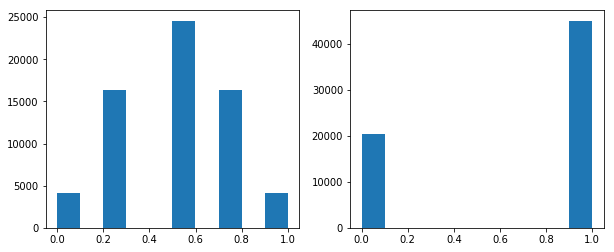

In [29]:
%%time
## INPUT
p_comb = [0, 1]
a_comb = [1]
binalize = True
threshold = 0.5 #where val > threshold, then val = 1


total_comb = len( p_comb ) ** 16 * len( a_comb ) ** 4
print(total_comb)
p_matrix = np.empty((total_comb, 16), dtype='float16')
q_matrix = np.empty((total_comb, 9), dtype='float16')
count = 0
p = ProgressBar(total_comb)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product(p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb):
    for a_11, a_12, a_21, a_22 in iter.product(a_comb, a_comb, a_comb, a_comb):
        q_matrix[count] = np.array([p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
                                    p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
                                    p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22, 
                                    p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
                                    p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
                                    p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
                                    p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
                                    p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
                                    p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22
                                   ],
                                  dtype="float16")
        p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44])
        count += 1
        p.update(count + 1)
q_matrix /= 4

## PLOTTING
fig, axes = plt.subplots(1,2, figsize = (10,4))
hist_data = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
axes[0].hist(hist_data)
if binalize == True:
    q_matrix[q_matrix < threshold] = 0
    q_matrix[q_matrix >= threshold] = 1
    hist_data_binalize = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
    axes[1].hist(hist_data_binalize)
    
np.savez_compressed('4x4matrix', p_matrix = p_matrix, q_matrix = q_matrix)

In [60]:
%%time
p_matrix = np.empty((2**16 * (2 ** 4 - 1), 16))
q_matrix = np.empty((2**16 * (2 ** 4 - 1), 9))
count = 0
p = ProgressBar(2**16 * (2 ** 4 - 1) - 1)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    for a_11, a_12, a_21, a_22 in iter.product([0.5,1],[0.5,1],[0.5,1],[0.5,1]):
        if (a_11, a_12, a_21, a_22) != (0.5,0.5,0.5,0.5):
            q_matrix[count] = np.array([p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
                                       p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
                                       p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22, 
                                        p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
                                       p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
                                       p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
                                        p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
                                       p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
                                       p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22
                                       ])
            p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44])
            count += 1
            p.update(count + 1)
            
q_matrix[q_matrix <= 1] = 0
q_matrix[q_matrix > 1] = 1

| |                #                             | 981744 Elapsed Time: 0:00:07

CPU times: user 7.46 s, sys: 297 ms, total: 7.75 s
Wall time: 7.65 s


In [12]:
%%time
p_matrix = np.empty((2**16 * (3 ** 4), 16))
q_matrix = np.empty((2**16 * (3 ** 4), 9))
count = 0
p = ProgressBar(2**16 * (3 ** 4) - 1)

for p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    for a_11, a_12, a_21, a_22 in iter.product([0.8,0.5,1],[0.8,0.5,1],[0.8,0.5,1],[0.8,0.5,1]):
        q_matrix[count] = np.array([p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
                                    p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
                                    p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22, 
                                    p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
                                    p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
                                    p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
                                    p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
                                    p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
                                    p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22
                                   ])
        p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_21, p_22, p_23, p_24, p_31, p_32, p_33, p_34, p_41, p_42, p_43, p_44])
        count += 1
        p.update(count + 1)
            
q_matrix[q_matrix <= 1] = 0
q_matrix[q_matrix > 1] = 1

- |                   #                         | 5304515 Elapsed Time: 0:00:37

CPU times: user 37.3 s, sys: 1.55 s, total: 38.9 s
Wall time: 38.2 s


## Saving as 4x4matrix.npz

In [19]:
%time np.savez_compressed('4x4matrix', p_matrix = p_matrix, q_matrix = q_matrix)

CPU times: user 761 ms, sys: 13.5 ms, total: 775 ms
Wall time: 778 ms


In [20]:
np.savez_compressed?

## Showing histgram of q_matrix

In [6]:
hist_data = [q_matrix[i][1] for i in range(q_matrix.shape[0])]

(array([331776.,      0., 442368.,      0.,      0., 221184.,      0.,
         49152.,      0.,   4096.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float16),
 <a list of 10 Patch objects>)

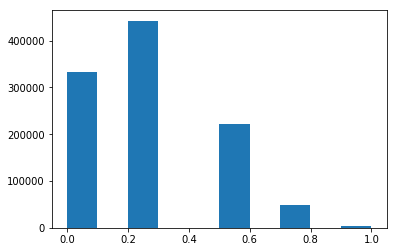

In [7]:
plt.figure()
plt.hist(hist_data)

In [16]:
q_matrix_copy = q_matrix.copy()
q_matrix_copy[q_matrix_copy <= 1] = 0
q_matrix_copy[q_matrix_copy > 1] = 1

(array([5308416.,       0.]), array([0, 1, 2]), <a list of 2 Patch objects>)

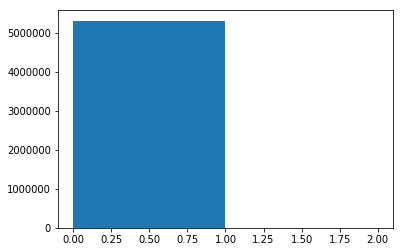

In [17]:
hist_data_binarized = [q_matrix_copy[i][0] for i in range( q_matrix_copy.shape[0] )]
plt.figure()
plt.hist(hist_data_binarized, bins = [0,1,2])

In [70]:
%time test = np.load("4x4matrix.npz")["p_matrix"]

CPU times: user 169 ms, sys: 11.8 ms, total: 181 ms
Wall time: 180 ms


In [32]:
plt.hist?

range(0, 8)